In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.
c:\users\aditya\miniconda3\envs\py36\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [28]:
np.random.seed(0)

In [29]:
n_pts = 765
X, y = datasets.make_circles(n_samples=n_pts, random_state=42, noise = 0.11, factor=0.22)
#print(X)
#print(y)

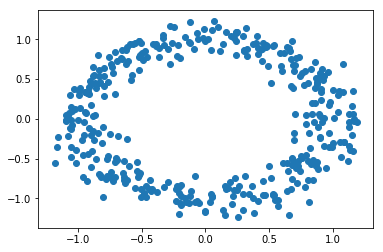

In [30]:
plt.scatter(X[y==0, 0], X[y==0, 1]) #plot the outer region

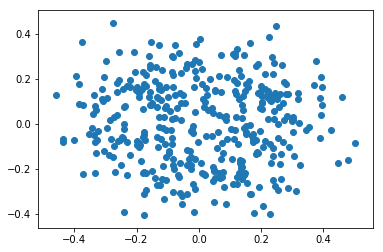

In [31]:
plt.scatter(X[y==1, 0], X[y==1, 1]) #plot the inner region

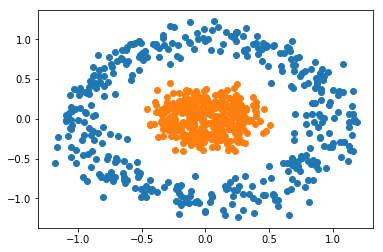

In [32]:
plt.scatter(X[y==0, 0], X[y==0, 1]) #plot the outer region
plt.scatter(X[y==1, 0], X[y==1, 1]) #plot the inner region
# plotting in the same graph

In [37]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.01), 'binary_crossentropy', metrics=['accuracy'])

In [38]:
h=model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs=50, shuffle = 'true')

Epoch 1/50
764/764 [==============================] - 0s 384us/step - loss: 0.7076 - acc: 0.4843
Epoch 2/50
764/764 [==============================] - 0s 90us/step - loss: 0.6919 - acc: 0.6531
Epoch 3/50
764/764 [==============================] - 0s 82us/step - loss: 0.6912 - acc: 0.6322
Epoch 4/50
764/764 [==============================] - 0s 81us/step - loss: 0.6896 - acc: 0.6492
Epoch 5/50
764/764 [==============================] - 0s 67us/step - loss: 0.6883 - acc: 0.6453
Epoch 6/50
764/764 [==============================] - 0s 80us/step - loss: 0.6826 - acc: 0.4097
Epoch 7/50
764/764 [==============================] - 0s 76us/step - loss: 0.6754 - acc: 0.7984
Epoch 8/50
764/764 [==============================] - 0s 80us/step - loss: 0.6653 - acc: 0.7670
Epoch 9/50
764/764 [==============================] - 0s 80us/step - loss: 0.6498 - acc: 0.8181
Epoch 10/50
764/764 [==============================] - 0s 67us/step - loss: 0.6299 - acc: 0.8010
Epoch 11/50
764/764 [=================

In [39]:
h

Text(0.5,1,'accuracy')

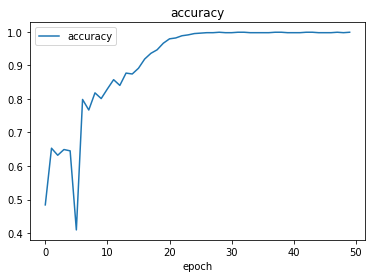

In [40]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5,1,'loss')

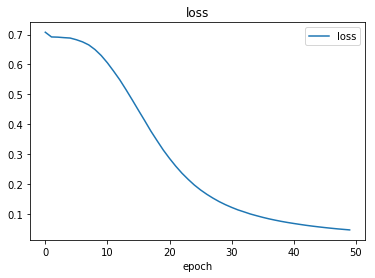

In [41]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [42]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - .25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - .25, max(X[:,1]) + 0.25, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

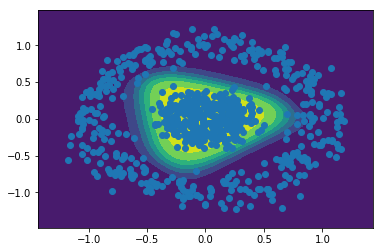

In [43]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [55]:
x = 0.1
y = -0.5

prediction is:  [[0.6329414]]


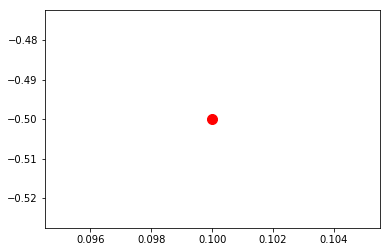

In [56]:
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)